# Diagnosis Data 

## Descriptive analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Import the data 

In [2]:
data =pd.read_csv('dia_3.csv', header=0) #diagnosis titles for sparse diffsydiw.csv

In [3]:
data.describe()

,_id,diagnose
count,110,109
unique,110,109
top,358,Maxillary sinus carcinoma sinus cancer
freq,1,1


In [4]:
d_titles =pd.read_csv('diagn_title.csv', header=0) #diagnosis titles 

In [5]:
d_titles.describe()

,id
count,1312.000000
mean,695.922256
std,415.983826
min,1.000000
25%,338.750000
50%,682.500000
75%,1029.250000
max,1548.000000


In [6]:
dia_t =pd.read_csv('dia_t.csv', header=0) #diagnosis titles linkable to the diffsydiw.csv

In [7]:
dia_t.tail()

,did,diagnose
1161,1529,Triple negative breast cancer
1162,1531,Invasive ductal carcinoma
1163,1533,Invasive lobular carcinoma
1164,1535,Dystonia
1165,1537,Failure to thrive - adult failure to thrive


In [8]:
#sparse matrix with complete overview of symptoms diseases 
#linkable with dia_t and sym_t 
#syd links with symptoms
#did links with diagnosis 
#wei means weight ( 0-common, 1-lifethreatening, and 2-common pediatrics added up)

In [9]:
diff =pd.read_csv('diffsydiw.csv', header=0)

In [43]:
diff.did.unique

<bound method Series.unique of 0        163.0
1        164.0
2        165.0
3        187.0
4        306.0
5        307.0
6        308.0
7        309.0
8        354.0
9        401.0
10       411.0
11       513.0
12       546.0
13       722.0
14        56.0
15       179.0
16       236.0
17       388.0
18       539.0
19       540.0
20       557.0
21       600.0
22       793.0
23       795.0
24        44.0
25       106.0
26       108.0
27       707.0
28       209.0
29       250.0
         ...  
5539    1034.0
5540     227.0
5541    1080.0
5542    1335.0
5543       2.0
5544     127.0
5545     425.0
5546     151.0
5547     279.0
5548     599.0
5549     199.0
5550     727.0
5551     726.0
5552    1050.0
5553     753.0
5554     897.0
5555     994.0
5556     322.0
5557     488.0
5558     103.0
5559    1077.0
5560     279.0
5561     934.0
5562     616.0
5563     613.0
5564     752.0
5565     277.0
5566     509.0
5567     188.0
5568       NaN
Name: did, Length: 5569, dtype: float64>

In [44]:
diff.describe()

,syd,did,wei
count,5568.000000,5568.000000,5371.000000
mean,130.832795,586.860273,1.077639
std,91.129211,391.554560,0.934605
min,1.000000,1.000000,0.000000
25%,48.000000,227.000000,0.000000
50%,115.000000,550.000000,1.000000
75%,219.000000,870.000000,2.000000
max,306.000000,1537.000000,3.000000


In [11]:
sym_3 =pd.read_csv('sym_3.csv', header=0) #symptoms tightly linked with sym dis matrix

In [19]:
sym_3.head()

,_id,symptom
0,1,Upper abdominal pain
1,2,Lower abdominal pain
2,4,Alcohol abuse
3,5,Anxiety (Nervousness)
4,6,Arm ache or pain


In [13]:
sym_dis_matrix =pd.read_csv('sym_dis_matrix.csv', header=0) #diagnosis titles for sparse diffsydiw.csv

In [14]:
sym_dis_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Columns: 110 entries, eye to 1511.0
dtypes: float64(110)
memory usage: 112.6 KB


In [15]:
symptoms =pd.read_csv('symptoms2.csv', header=0) #diagnosis titles for sparse diffsydiw.csv

In [16]:
symptoms.head()

,_id,chief_complaint_id,chief_complaint_name_id,name,reason_code,life_threatening,msp_enabled,primary_complaint,diagnosis_count
0,1,1,1,Upper abdominal pain,15453.0,0.0,1.0,1.0,44
1,2,1,2,Upper belly pain,15453.0,0.0,1.0,NaN,44
2,4,2,4,Lower abdominal pain,15452.0,0.0,1.0,1.0,48
3,5,2,5,Lower belly pain,15452.0,0.0,1.0,NaN,48
4,6,3,6,Abscess (Collection of pus),NaN,NaN,NaN,NaN,17


In [17]:
sym_t =pd.read_csv('sym_t.csv', header=0) #list of symptoms linked to diffsydiw.csv

In [18]:
sym_t.head()

,syd,symptom
0,1,Upper abdominal pain
1,2,Lower abdominal pain
2,3,Abscess (Collection of pus)
3,4,Alcohol abuse
4,5,Anxiety (Nervousness)


# Work only with the difussion matrix

In [22]:
diff.corr()

,syd,did,wei
syd,1.000000,0.041930,0.101974
did,0.041930,1.000000,-0.199741
wei,0.101974,-0.199741,1.000000


In [48]:
diff.isnull().sum()

syd      1
did      1
wei    198
dtype: int64

In [51]:
med= diff.groupby('syd')['wei'].transform('median')
diff['wei'] = diff['wei'].fillna(med)

In [52]:
diff.isnull().sum()

syd    1
did    1
wei    1
dtype: int64

In [53]:
diff = diff.dropna(how='any',axis=0) 

In [54]:
diff.isnull().sum()

syd    0
did    0
wei    0
dtype: int64

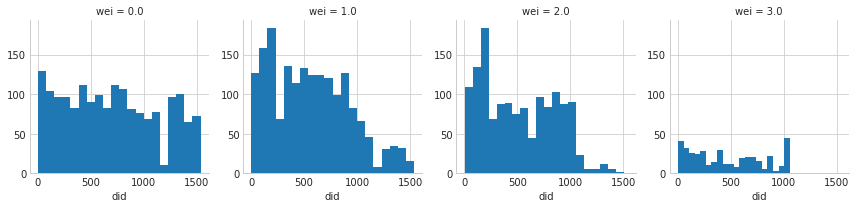

In [26]:
g = sns.FacetGrid(diff, col='wei')
g.map(plt.hist, 'did', bins=20)

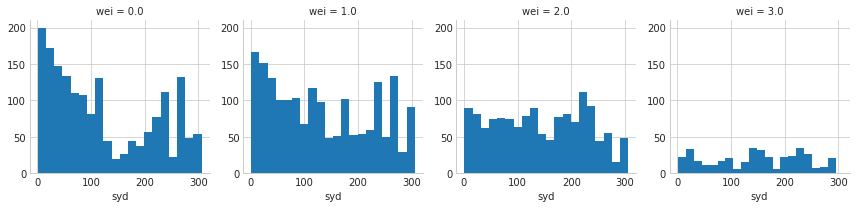

In [27]:
g = sns.FacetGrid(diff, col='wei')
g.map(plt.hist, 'syd', bins=20)

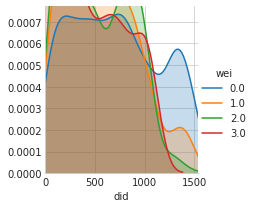

In [31]:

facet = sns.FacetGrid(diff, hue="wei")
facet.map(sns.kdeplot,'did',shade= True)
facet.set(xlim=(0, diff['did'].max()))
facet.add_legend()

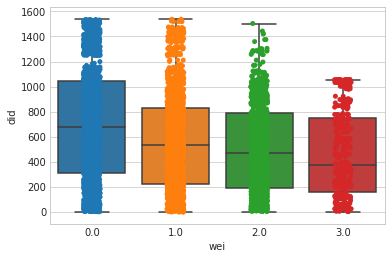

In [36]:
ax = sns.boxplot(x="wei", y="did", 
                 data=diff)
ax = sns.stripplot(x="wei", y="did",
                   data=diff, jitter=True,
                   edgecolor="blue")

## Creating the model

In [38]:
from sklearn.model_selection import train_test_split

In [57]:
y = diff.did # define the target variable (dependent variable) as y

In [58]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(diff, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(4454, 3) (4454,)
(1114, 3) (1114,)


## using Regression model

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

predictors = ["syd","wei"]

alg = LogisticRegression(random_state=123)
scores = cross_validation.cross_val_score(
    alg,
    X_train[predictors],
    y_train,
    cv=2
)

print(scores.mean())



/home/carel/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=2.
  % (min_labels, self.n_folds)), Warning)


0.0131075919863


In [60]:
model = alg.fit(X_train[predictors],y_train)

In [61]:
predictions1 =alg.predict(X_test[predictors])

In [62]:
model.score(X_test[predictors], y_test)

0.010771992818671455

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [65]:
print(mean_absolute_error(y_test, predictions1))

462.237881508


In [66]:
accuracy_score(y_test, predictions1)

0.010771992818671455

In [67]:
accuracy_score(y_test, predictions1, normalize=False)

12

## Using Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

rdf = RandomForestClassifier(
    random_state=140,
    n_estimators=150,
    min_samples_split=5,
    min_samples_leaf=2
)

scores = cross_validation.cross_val_score(
    rdf,
    X_train[predictors],
    y_train,
    cv=1
)

print(scores.mean())

/home/carel/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=12.
  % (min_labels, self.n_folds)), Warning)


0.00979531941588


In [72]:
model1 = rdf.fit(X_train[predictors],y_train)

predictions2 =rdf.predict(X_test[predictors])

model1.score(X_test[predictors], y_test)

0.0089766606822262122

In [73]:
print(mean_absolute_error(y_test, predictions2))

accuracy_score(y_test, predictions2)

accuracy_score(y_test, predictions2, normalize=False)


401.538599641


10

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [75]:
# using DecisionTreeClassifier

In [76]:
clf = DecisionTreeClassifier(random_state=140)
scores = cross_validation.cross_val_score(
    clf,
    X_train[predictors],
    y_train,
    cv=3
)

print(scores.mean())

0.00450146156408


In [77]:
model2 = clf.fit(X_train[predictors],y_train)

predictions3 =clf.predict(X_test[predictors])

model2.score(X_test[predictors], y_test)

0.0089766606822262122

In [78]:
print(mean_absolute_error(y_test, predictions3))

accuracy_score(y_test, predictions3)

accuracy_score(y_test, predictions3, normalize=False)

451.982046679


10

In [79]:
neigh = KNeighborsClassifier(n_neighbors=5)
scores = cross_validation.cross_val_score(
    neigh,
    X_train[predictors],
    y_train,
    cv=3
)

print(scores.mean())

0.00603780512154


In [80]:
model3 = neigh.fit(X_train[predictors],y_train)

predictions4 =neigh.predict(X_test[predictors])

model3.score(X_test[predictors], y_test)

# Accuracy of model is at 72.01%

0.00089766606822262122

In [82]:
## Using XGBoost

from xgboost import XGBRegressor

predictors = ["syd","wei"]

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)

scores = cross_validation.cross_val_score(
    xgb,
    X_train[predictors],
    y_train,
    cv=3
)

print(scores.mean())

0.0423159854363


In [83]:
model7 = xgb.fit(X_train[predictors],y_train)

predictions8 =xgb.predict(X_test[predictors])

model7.score(X_test[predictors], y_test)

0.079406010066192856

In [84]:
print(mean_absolute_error(y_test, predictions8))

predictions8 =  [int(x) for x in predictions8]

accuracy_score(y_test, predictions8)

accuracy_score(y_test, predictions8, normalize=False)


313.944058649


2

In [85]:
## Using Keras

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras import optimizers

import numpy as np

Using TensorFlow backend.
